Using Devcie: cuda:0
[Epoch 0]
진짜 뭐지??


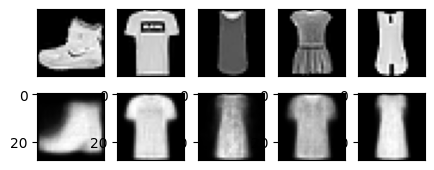

[Epoch 1]
진짜 뭐지??


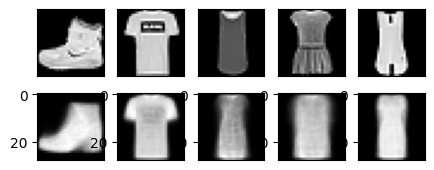

[Epoch 2]
진짜 뭐지??


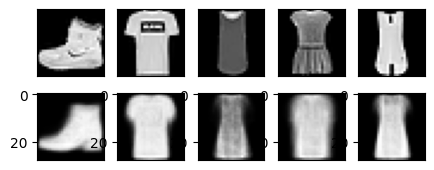

[Epoch 3]
진짜 뭐지??


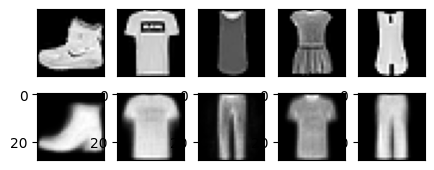

[Epoch 4]
진짜 뭐지??


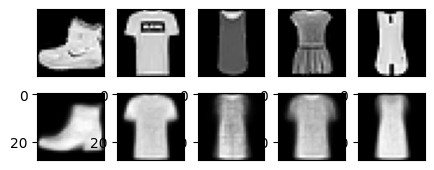

[Epoch 5]
진짜 뭐지??


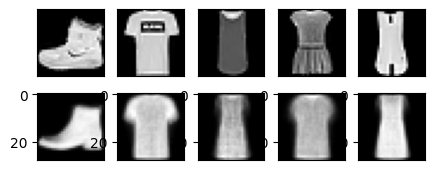

[Epoch 6]
진짜 뭐지??


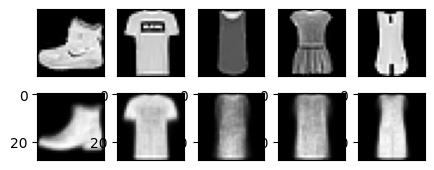

[Epoch 7]
진짜 뭐지??


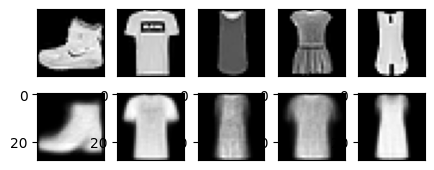

[Epoch 8]
진짜 뭐지??


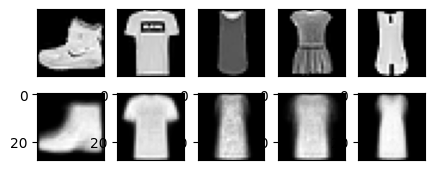

[Epoch 9]
진짜 뭐지??


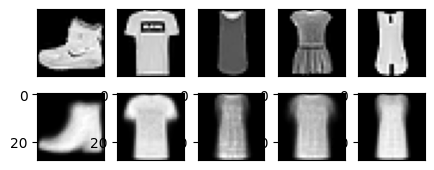

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.models as models
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        # 인코더는 간단하 신경망으로 분류모델처럼 생겼습니다.
        self.encoder = nn.Sequential( # nn.Sequential을 사용해 encoder와 decoder 두 모듈로 묶어줍니다.
            nn.Linear(28*28, 128), # 차원을 28*28에서 점차 줄여나간다.
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12),
            nn.ReLU(),
            nn.Linear(12, 3),
        )
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12), # 디코더는 차원을 점차 28*28로 복원한다.
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid(), # 픽셀당 0과 1사이로 값을 출력하는 sigmoid()함수를 추가한다.
        )
        
    def forward(self, x):
        encoded = self.encoder(x) # encoder는 encoded라는 잠재 변수를 만들고
        decoded = self.decoder(encoded) # decoder를 통해 decoded라는 복원이미지를 만든다.
        return encoded, decoded


def main():
    epoch = 10
    batch_size = 64
    use_cuda = torch.cuda.is_available()
    device = torch.device('cuda:0' if use_cuda else 'cpu')
    print("Using Devcie:", device)
    
    trainset = datasets.FashionMNIST(
        root='./data/',
        train=True,
        download=True,
        transform=transforms.ToTensor()
    )
    
    train_loader = DataLoader(dataset=trainset, batch_size=4, shuffle=True)
    
    autoencoder = AutoEncoder().to(device)
    optimizer = torch.optim.Adam(autoencoder.parameters(), lr=0.005)
    criterion = nn.MSELoss() # 원본값과 디코더에서 나온 값의 차이를 계산하기 위해 MSE 오차함수를 사용한다.
    
    view_data = trainset.data[:5].view(-1, 28*28)
    view_data = view_data.type(torch.FloatTensor) / 255.
    
    autoencoder.train()
    
    for epoch in range(0, epoch):
        for step, (x, label) in enumerate(train_loader):
            x = x.view(-1, 28*28).to(device)
            y = x.view(-1, 28*28).to(device) # x(입력)와 y(대상 레이블) 모두 원본이미지 x이다.
            label = label.to(device)
            
            encoded, decoded = autoencoder(x)
            
            loss = criterion(decoded, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        # 디코더에서 나온 이미지를 시각화 하기
        # 앞서 시각화를 위해 남겨둔 5개의 이미지를 한 epoch만큼 학습을 마친 모델에 넣어 복원이미지를 만든다.
        test_x = view_data.to(device)
        _, decoded_data = autoencoder(test_x)
        
        f, a = plt.subplots(2, 5, figsize=(5, 2))
        print("[Epoch {}]".format(epoch))
        
        # 원본 데이터 출력
        for i in range(5):
            img = np.reshape(view_data.data.numpy()[i], (28, 28)) # 파이토치 텐서를 넘파이로 변환
            a[0][i].imshow(img, cmap='gray')
            a[0][i].set_xticks(()); a[0][i].set_yticks(())
            
        for i in range(5):
            img = np.reshape(decoded_data.data.cpu().numpy()[i], (28, 28))
            a[1][i].imshow(img, cmap='gray')
            a[1][i].set_xticks(()); a[0][i].set_yticks(())
        
        plt.show()
    
        
        
if __name__ == '__main__':
    main()
    
    